In [1]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get_available_datasets

In [3]:
# start = datetime.datetime(2010, 12, 31)
# end = datetime.datetime(2013, 12, 31)
# ff = web.DataReader('F-F_Research_Data_Factors', "famafrench")
dateparse = lambda x: pd.datetime.strptime(x, '%Y%m')
ff = pd.read_csv('F-F_Research_Data_Factors.csv',index_col=0, parse_dates=True, date_parser=dateparse)
ff = ff / 100
ff.head()

,Mkt-RF,SMB,HML,RF
1926-07-01,0.0296,-0.0230,-0.0287,0.0022
1926-08-01,0.0264,-0.0140,0.0419,0.0025
1926-09-01,0.0036,-0.0132,0.0001,0.0023
1926-10-01,-0.0324,0.0004,0.0051,0.0032
1926-11-01,0.0253,-0.0020,-0.0035,0.0031


In [4]:
ff.tail()

,Mkt-RF,SMB,HML,RF
2017-05-01,0.0106,-0.0254,-0.0375,0.0006
2017-06-01,0.0078,0.0215,0.0132,0.0006
2017-07-01,0.0187,-0.0142,-0.0028,0.0007
2017-08-01,0.0017,-0.0171,-0.0226,0.0007
2017-09-01,0.0251,0.0454,0.0304,0.0009


In [5]:
ff['Market-Return'] = ff['Mkt-RF'] + ff['RF']

In [6]:
ff.head()

,Mkt-RF,SMB,HML,RF,Market-Return
1926-07-01,0.0296,-0.0230,-0.0287,0.0022,0.0318
1926-08-01,0.0264,-0.0140,0.0419,0.0025,0.0289
1926-09-01,0.0036,-0.0132,0.0001,0.0023,0.0059
1926-10-01,-0.0324,0.0004,0.0051,0.0032,-0.0292
1926-11-01,0.0253,-0.0020,-0.0035,0.0031,0.0284


In [7]:
ff6313 = ff['1963-12-01':'2013-12-31']
ff6313.head()

,Mkt-RF,SMB,HML,RF,Market-Return
1963-12-01,0.0183,-0.0196,-0.0010,0.0029,0.0212
1964-01-01,0.0224,-0.0019,0.0161,0.0030,0.0254
1964-02-01,0.0154,0.0009,0.0282,0.0026,0.0180
1964-03-01,0.0141,0.0099,0.0334,0.0031,0.0172
1964-04-01,0.0010,-0.0136,-0.0053,0.0029,0.0039


In [8]:
ff6313.tail()

,Mkt-RF,SMB,HML,RF,Market-Return
2013-08-01,-0.0271,0.0030,-0.0278,0.0,-0.0271
2013-09-01,0.0377,0.0294,-0.0118,0.0,0.0377
2013-10-01,0.0418,-0.0149,0.0115,0.0,0.0418
2013-11-01,0.0312,0.0124,0.0024,0.0,0.0312
2013-12-01,0.0281,-0.0050,-0.0030,0.0,0.0281


These tables are the same as the ouput on page 118.

In [9]:
ff6313['RF-Gross'] = ff6313['RF'] + 1
ff6313['RF-Gross']['1963-12-01'] = 1
ff6313['Market-Return-Gross'] = ff6313['Market-Return'] + 1
ff6313['Market-Return-Gross']['1963-12-01'] = 1

/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set o

In [10]:
ff6313.head()

,Mkt-RF,SMB,HML,RF,Market-Return,RF-Gross,Market-Return-Gross
1963-12-01,0.0183,-0.0196,-0.0010,0.0029,0.0212,1.0000,1.0000
1964-01-01,0.0224,-0.0019,0.0161,0.0030,0.0254,1.0030,1.0254
1964-02-01,0.0154,0.0009,0.0282,0.0026,0.0180,1.0026,1.0180
1964-03-01,0.0141,0.0099,0.0334,0.0031,0.0172,1.0031,1.0172
1964-04-01,0.0010,-0.0136,-0.0053,0.0029,0.0039,1.0029,1.0039


In [11]:
ff6313['Market-Return-Gross-Cum'] = ff6313['Market-Return-Gross'].cumprod()
ff6313['RF-Gross-Cum'] = ff6313['RF-Gross'].cumprod()
ff6313.head()

/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dsr/Documents/HustleProjects/financethroughpython/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Mkt-RF,SMB,HML,RF,Market-Return,RF-Gross,Market-Return-Gross,Market-Return-Gross-Cum,RF-Gross-Cum
1963-12-01,0.0183,-0.0196,-0.0010,0.0029,0.0212,1.0000,1.0000,1.000000,1.000000
1964-01-01,0.0224,-0.0019,0.0161,0.0030,0.0254,1.0030,1.0254,1.025400,1.003000
1964-02-01,0.0154,0.0009,0.0282,0.0026,0.0180,1.0026,1.0180,1.043857,1.005608
1964-03-01,0.0141,0.0099,0.0334,0.0031,0.0172,1.0031,1.0172,1.061812,1.008725
1964-04-01,0.0010,-0.0136,-0.0053,0.0029,0.0039,1.0029,1.0039,1.065953,1.011650


The output in these tables is very similar to the one on page 119.

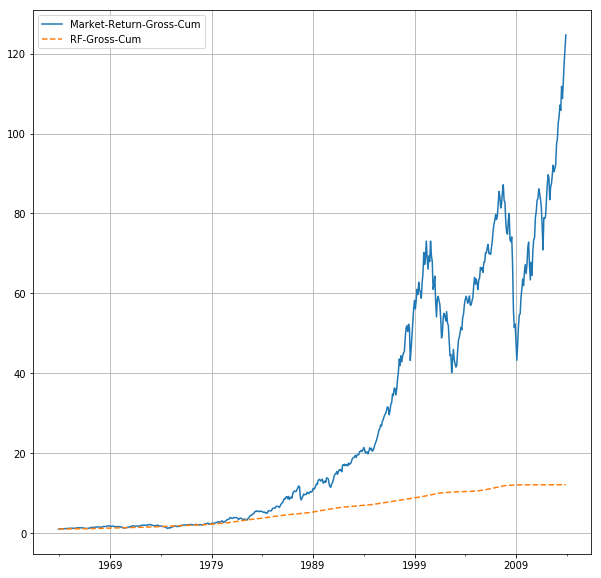

In [12]:
ff6313[['Market-Return-Gross-Cum','RF-Gross-Cum']].plot(figsize=(10,10), grid=True,style=['-','--'])

The chart above is very similar to the one in Figure 4.1 on page 120.

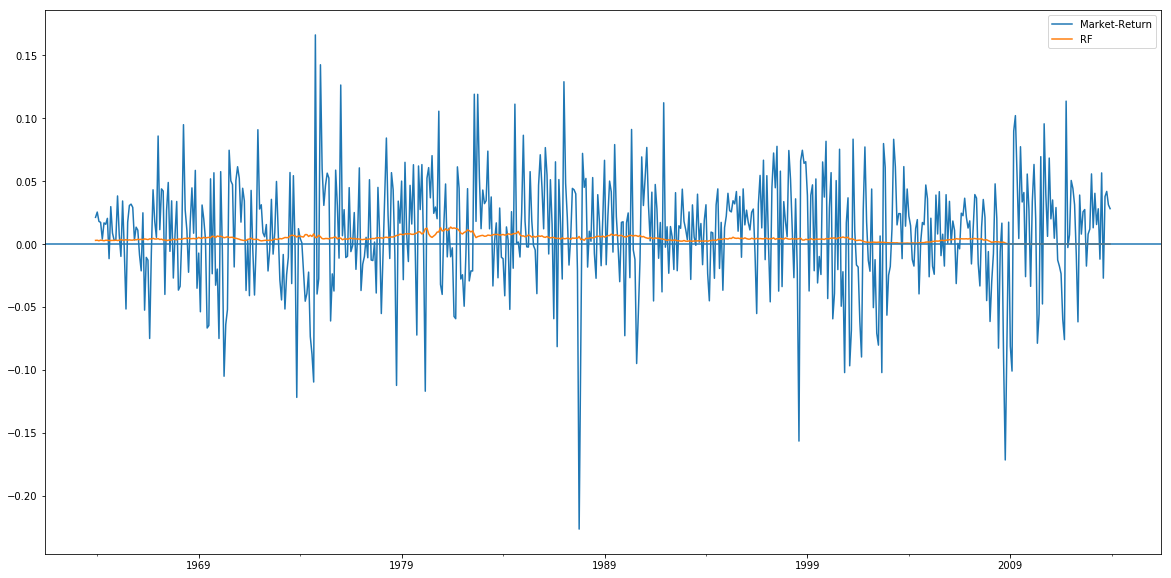

In [13]:
ff6313[['Market-Return','RF']].plot(figsize=(20,10)).axhline(0)

Similarly, the chart above is very similar to the one in Figure 4.2 on page 122.

In [14]:
start = datetime.datetime(2010, 12, 31)
end = datetime.datetime(2013, 12, 31)
amzn = web.DataReader("AMZN", 'yahoo', start, end)[['Adj Close']]
amzn['Returns'] = amzn['Adj Close'].pct_change()

In [15]:
amzn.head()

,Adj Close,Returns
Date,,
2010-12-31,180.000000,NaN
2011-01-03,184.220001,0.023444
2011-01-04,185.009995,0.004288
2011-01-05,187.419998,0.013026
2011-01-06,185.860001,-0.008324


In [16]:
amznvar1113 = amzn['Returns'].var()
amznstd1113 = amzn['Returns'].std()
amznret1113 = amzn['Returns'].mean()

In [17]:
print amznvar1113
print amznstd1113
print amznret1113

0.000425095086513
0.0206178341858
0.00126667926726


These numbers are the same as the ones on the page 123.

In [18]:
amznvar11 = amzn['Returns']['2011'].var()
amznstd11 = amzn['Returns']['2011'].std()
amznret11 = amzn['Returns']['2011'].mean()
print amznvar11
print amznstd11
print amznret11

0.000585269325943
0.0241923402329
0.000138563342241


In [19]:
amznvar12 = amzn['Returns']['2012'].var()
amznstd12 = amzn['Returns']['2012'].std()
amznret12 = amzn['Returns']['2012'].mean()
print amznvar12
print amznstd12
print amznret12

0.000401523124553
0.0200380419341
0.00168024684704


In [20]:
amznvar13 = amzn['Returns']['2013'].var()
amznstd13 = amzn['Returns']['2013'].std()
amznret13 = amzn['Returns']['2013'].mean()
print amznvar13
print amznstd13
print amznret13

0.00028972679021
0.0170213627601
0.00198450989488


In [21]:
d = {'2011-2013' : [amznvar1113,amznstd1113,amznret1113],'2011' : [amznvar11,amznstd11,amznret11],'2012' : [amznvar12,amznstd12,amznret12], '2013' : [amznvar13,amznstd13,amznret13]}
pd.DataFrame(d, index=['Variance', 'Std Dev', 'Mean'])


,2011,2011-2013,2012,2013
Variance,0.000585,0.000425,0.000402,0.000290
Std Dev,0.024192,0.020618,0.020038,0.017021
Mean,0.000139,0.001267,0.001680,0.001985


Ignoring the order of columns the table above is the same as the output at the top of the page 126.

In [22]:
import math
d2 = {'2011-2013' : [amznvar1113*252,amznstd1113*math.sqrt(252),amznret1113*252],'2011' : [amznvar11*252,amznstd11*math.sqrt(252),amznret11*252],'2012' : [amznvar12*252,amznstd12*math.sqrt(252),amznret12*252], '2013' : [amznvar13*252,amznstd13*math.sqrt(252),amznret13*252]}
pd.DataFrame(d2, index=['Variance', 'Std Dev', 'Mean'])

,2011,2011-2013,2012,2013
Variance,0.147488,0.107124,0.101184,0.073011
Std Dev,0.384041,0.327298,0.318094,0.270206
Mean,0.034918,0.319203,0.423422,0.500096


Ignoring the order of columns the table above is the same as the output at the bottom of the page 126.

In [23]:
amzn_weight = 0.25
ibm_weight = 0.75
amzn2 = web.DataReader("AMZN", 'yahoo', start, end)[['Adj Close']]
amzn2['Returns'] = amzn2['Adj Close'].pct_change()
amzn2.columns = ['AMZN.AdjClose','AMZN.Returns']
ibm2 = web.DataReader("IBM", 'yahoo', start, end)[['Adj Close']]
ibm2['Returns'] = ibm2['Adj Close'].pct_change()
ibm2.columns = ['IBM.AdjClose','IBM.Returns']
rettable = pd.concat([amzn2,ibm2], join='outer',axis=1)
rettable.head()

,AMZN.AdjClose,AMZN.Returns,IBM.AdjClose,IBM.Returns
Date,,,,
2010-12-31,180.000000,NaN,122.063370,NaN
2011-01-03,184.220001,0.023444,122.662216,0.004906
2011-01-04,185.009995,0.004288,122.795311,0.001085
2011-01-05,187.419998,0.013026,122.304588,-0.003996
2011-01-06,185.860001,-0.008324,123.643654,0.010949


In [24]:
amznstd = rettable['AMZN.Returns'].std()*math.sqrt(252)
ibmstd = rettable['IBM.Returns'].std()*math.sqrt(252)
print amznstd, ibmstd

0.32729797097 0.192347640272


In [25]:
amznibmcov = rettable[['AMZN.Returns','IBM.Returns']].cov()['AMZN.Returns'][1]*252
print amznibmcov

0.0232695803999


In [26]:
rettable[['AMZN.Returns','IBM.Returns']].corr()['AMZN.Returns'][1]

0.36962247979750362

In [27]:
rettable[['AMZN.Returns','IBM.Returns']].corr()['AMZN.Returns'][1]*amznstd*ibmstd

0.023269580399883222

In [28]:
amzn_weight**2*amznstd**2+ibm_weight**2*ibmstd**2+2*amznibmcov*amzn_weight*ibm_weight

0.036232498541601932

In [29]:
math.sqrt(amzn_weight**2*amznstd**2+ibm_weight**2*ibmstd**2+2*amznibmcov*amzn_weight*ibm_weight)

0.19034836101632693

In [30]:
rettable['PortReturn'] = rettable['AMZN.Returns']*amzn_weight+rettable['IBM.Returns']*ibm_weight

In [31]:
rettable['PortReturn'].var()*252

0.036232498541601939

In [32]:
rettable['PortReturn'].std()*math.sqrt(252)

0.19034836101632696

The figures above are the same ones as on pages 127-130. I have also reconfirmed by calculating portfolio returns directly and taking its standard deviation / variance.